In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.grid_search

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/train.csv')
test = pd.read_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/test.csv')

In [5]:
test.head()

,Tern,Thrush,Tick,Tiger,Tiglon,Toad,Tortoise,Trout,Tuna,Turkey,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,10037.569173,-49.659246,-1.136071,s,False,l,-26.668479,-416.498726,-68609.347455,9.545921e+04,...,b,-1.654323e+06,-1.342072,-3.528056e+07,64.911670,-0.314766,b,m1,x,0
1,309793.427988,-49.659246,-0.405625,s,NaN,s,-9.135203,-504.070169,-39477.100060,1.993753e+06,...,a,-3.070990e+06,-1.340854,-3.528065e+07,-12.327810,0.836566,b,s1,r,0
2,-211799.890072,-49.659246,-1.264768,s,NaN,s,-33.497916,-369.689046,-8971.914423,5.490111e+04,...,b,2.571013e+05,-1.305239,-3.528212e+07,-65.275581,0.405433,b,k1,x,0
3,126491.946464,-49.659246,-0.657188,s,NaN,s,-13.408124,-474.511672,-2781.100939,1.906031e+05,...,a,-3.562542e+06,-1.295844,-3.527862e+07,-131.275734,0.076052,b,s1,s,1
4,-263898.558134,-49.659246,-0.806868,s,NaN,l,-16.425848,-426.317969,-43766.391718,1.533545e+05,...,b,-1.329357e+06,-1.341364,-3.528261e+07,389.990411,-0.341824,b,k1,m,1


In [6]:
test.shape

(1031, 31)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           1031 non-null   float64
 1   Thrush         1031 non-null   float64
 2   Tick           1031 non-null   float64
 3   Tiger          1031 non-null   object 
 4   Tiglon         516 non-null    object 
 5   Toad           1031 non-null   object 
 6   Tortoise       1031 non-null   float64
 7   Trout          1031 non-null   float64
 8   Tuna           1031 non-null   float64
 9   Turkey         1031 non-null   float64
 10  Turtle         1031 non-null   float64
 11  Tyrannosaurus  1031 non-null   float64
 12  Urial          1031 non-null   object 
 13  Vicuna         0 non-null      float64
 14  Viper          1031 non-null   float64
 15  Vole           1031 non-null   float64
 16  Vulture        1031 non-null   object 
 17  Wallaby        485 non-null    float64
 18  Walrus  

In [8]:
((test.isna().sum())/1031)*100

Tern               0.000000
Thrush             0.000000
Tick               0.000000
Tiger              0.000000
Tiglon            49.951503
Toad               0.000000
Tortoise           0.000000
Trout              0.000000
Tuna               0.000000
Turkey             0.000000
Turtle             0.000000
Tyrannosaurus      0.000000
Urial              0.000000
Vicuna           100.000000
Viper              0.000000
Vole               0.000000
Vulture            0.000000
Wallaby           52.958293
Walrus             0.000000
Wasp               0.000000
Warbler            0.000000
Weasel             0.000000
Whale              0.000000
Whippet            0.000000
Whitefish          0.000000
Wildcat            0.000000
Wildebeest         0.000000
Wildfowl           0.000000
Wolf               0.000000
Wolverine          0.000000
target             0.000000
dtype: float64

In [9]:
test.drop("Vicuna", axis = 1, inplace = True)
test.drop("Tiglon", axis = 1, inplace = True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           1031 non-null   float64
 1   Thrush         1031 non-null   float64
 2   Tick           1031 non-null   float64
 3   Tiger          1031 non-null   object 
 4   Toad           1031 non-null   object 
 5   Tortoise       1031 non-null   float64
 6   Trout          1031 non-null   float64
 7   Tuna           1031 non-null   float64
 8   Turkey         1031 non-null   float64
 9   Turtle         1031 non-null   float64
 10  Tyrannosaurus  1031 non-null   float64
 11  Urial          1031 non-null   object 
 12  Viper          1031 non-null   float64
 13  Vole           1031 non-null   float64
 14  Vulture        1031 non-null   object 
 15  Wallaby        485 non-null    float64
 16  Walrus         1031 non-null   float64
 17  Wasp           1031 non-null   int64  
 18  Warbler 

In [11]:
df.head()

,Tern,Thrush,Tick,Tiger,Tiglon,Toad,Tortoise,Trout,Tuna,Turkey,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,-253077.772390,-49.659246,-0.679765,s,NaN,l,-12.055165,-463.332642,-41860.419322,3.256739e+05,...,a,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,b,k1,m,1
1,380192.123132,-49.659246,-1.356456,s,False,l,-30.235998,-388.822813,-94810.029959,1.154421e+03,...,b,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,b,m1,x,0
2,-218627.876963,-49.659246,-0.542194,s,False,l,-10.443575,-519.014942,-46075.931683,2.248867e+06,...,a,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,b,s2,r,0
3,-178076.879466,-49.659246,-0.485974,s,NaN,l,-8.374563,-504.614247,-73554.391505,1.452062e+07,...,a,2.814345e+07,-1.073553,-3.536497e+07,-359.320759,0.003191,m,k1,w,0
4,-169250.190006,-49.659246,-0.600561,s,False,l,-10.269902,-455.225099,-41390.990681,2.689196e+05,...,a,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,b,j1,s,0


In [12]:
df.head()

,Tern,Thrush,Tick,Tiger,Tiglon,Toad,Tortoise,Trout,Tuna,Turkey,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,-253077.772390,-49.659246,-0.679765,s,NaN,l,-12.055165,-463.332642,-41860.419322,3.256739e+05,...,a,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,b,k1,m,1
1,380192.123132,-49.659246,-1.356456,s,False,l,-30.235998,-388.822813,-94810.029959,1.154421e+03,...,b,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,b,m1,x,0
2,-218627.876963,-49.659246,-0.542194,s,False,l,-10.443575,-519.014942,-46075.931683,2.248867e+06,...,a,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,b,s2,r,0
3,-178076.879466,-49.659246,-0.485974,s,NaN,l,-8.374563,-504.614247,-73554.391505,1.452062e+07,...,a,2.814345e+07,-1.073553,-3.536497e+07,-359.320759,0.003191,m,k1,w,0
4,-169250.190006,-49.659246,-0.600561,s,False,l,-10.269902,-455.225099,-41390.990681,2.689196e+05,...,a,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,b,j1,s,0


**Copying the data.**

In [13]:
data = df.copy()

Shape of the raw data: Number of data points(rows) and number of features(columns).

In [14]:
data.shape

(7003, 31)

**Exploratory Data Analysis: Data information, Analysis, Visualization**

Information about the data.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           7003 non-null   float64
 1   Thrush         7003 non-null   float64
 2   Tick           7003 non-null   float64
 3   Tiger          7003 non-null   object 
 4   Tiglon         3617 non-null   object 
 5   Toad           7003 non-null   object 
 6   Tortoise       7003 non-null   float64
 7   Trout          7003 non-null   float64
 8   Tuna           7003 non-null   float64
 9   Turkey         7003 non-null   float64
 10  Turtle         7003 non-null   float64
 11  Tyrannosaurus  7003 non-null   float64
 12  Urial          7003 non-null   object 
 13  Vicuna         0 non-null      float64
 14  Viper          7003 non-null   float64
 15  Vole           7003 non-null   float64
 16  Vulture        7003 non-null   object 
 17  Wallaby        3471 non-null   float64
 18  Walrus  

**Percentage of Missing values**

In [16]:
((data.isna().sum())/7003)*100

Tern               0.000000
Thrush             0.000000
Tick               0.000000
Tiger              0.000000
Tiglon            48.350707
Toad               0.000000
Tortoise           0.000000
Trout              0.000000
Tuna               0.000000
Turkey             0.000000
Turtle             0.000000
Tyrannosaurus      0.000000
Urial              0.000000
Vicuna           100.000000
Viper              0.000000
Vole               0.000000
Vulture            0.000000
Wallaby           50.435528
Walrus             0.000000
Wasp               0.000000
Warbler            0.000000
Weasel             0.000000
Whale              0.000000
Whippet            0.000000
Whitefish          0.000000
Wildcat            0.000000
Wildebeest         0.000000
Wildfowl           0.000000
Wolf               0.000000
Wolverine          0.000000
target             0.000000
dtype: float64

**Dropping the columns "Tiglon and Vicuna, We see that Vicuna has 100% missing data and Tiglon has only info stating "False" rest data is unknown in Tiglon feature so removing them.**

In [17]:
data.drop("Vicuna", axis = 1, inplace = True)
data.drop("Tiglon", axis = 1, inplace = True)

In [18]:
data

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,-253077.772390,-49.659246,-0.679765,s,l,-12.055165,-463.332642,-41860.419322,3.256739e+05,-4.542838e+11,...,a,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,b,k1,m,1
1,380192.123132,-49.659246,-1.356456,s,l,-30.235998,-388.822813,-94810.029959,1.154421e+03,-3.356728e+12,...,b,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,b,m1,x,0
2,-218627.876963,-49.659246,-0.542194,s,l,-10.443575,-519.014942,-46075.931683,2.248867e+06,-1.671217e+11,...,a,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,b,s2,r,0
3,-178076.879466,-49.659246,-0.485974,s,l,-8.374563,-504.614247,-73554.391505,1.452062e+07,-1.832696e+14,...,a,2.814345e+07,-1.073553,-3.536497e+07,-359.320759,0.003191,m,k1,w,0
4,-169250.190006,-49.659246,-0.600561,s,l,-10.269902,-455.225099,-41390.990681,2.689196e+05,-5.327237e+17,...,a,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,b,j1,s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,-246840.700218,-49.659246,-1.180932,s,l,-25.887398,-397.556639,-93903.183437,7.822274e+04,-1.671217e+11,...,b,4.398786e+05,-1.342072,-3.536359e+07,159.699665,-0.294403,b,r2,x,0
6999,-32731.429095,-49.659246,-0.355033,s,l,-6.157721,-504.683096,-86026.110161,3.389865e+06,-4.542838e+11,...,a,1.224437e+07,-1.342072,-3.536138e+07,163.732671,-0.379221,b,s1,z,0
7000,-73991.670435,-49.659246,-0.868682,s,l,-16.315083,-463.735452,-96302.545530,9.704820e+04,-2.716614e+16,...,a,2.453862e+06,-1.305983,-3.536540e+07,-172.033458,0.150357,b,e2,m,0
7001,-278624.327833,-16.772943,-0.675340,s,u,-11.704156,-472.480093,-41097.931591,9.764238e+05,-1.384571e+18,...,a,-6.285754e+06,-1.342015,-3.536361e+07,-67.920425,-0.030202,b,r2,h,0


In [19]:
data.head()

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,-253077.772390,-49.659246,-0.679765,s,l,-12.055165,-463.332642,-41860.419322,3.256739e+05,-4.542838e+11,...,a,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,b,k1,m,1
1,380192.123132,-49.659246,-1.356456,s,l,-30.235998,-388.822813,-94810.029959,1.154421e+03,-3.356728e+12,...,b,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,b,m1,x,0
2,-218627.876963,-49.659246,-0.542194,s,l,-10.443575,-519.014942,-46075.931683,2.248867e+06,-1.671217e+11,...,a,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,b,s2,r,0
3,-178076.879466,-49.659246,-0.485974,s,l,-8.374563,-504.614247,-73554.391505,1.452062e+07,-1.832696e+14,...,a,2.814345e+07,-1.073553,-3.536497e+07,-359.320759,0.003191,m,k1,w,0
4,-169250.190006,-49.659246,-0.600561,s,l,-10.269902,-455.225099,-41390.990681,2.689196e+05,-5.327237e+17,...,a,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,b,j1,s,0


In [20]:
data['Wallaby'].head(25)

0    -1.800251e+07
1              NaN
2              NaN
3              NaN
4              NaN
5    -1.490572e+07
6    -5.157540e+06
7    -1.870867e+07
8              NaN
9              NaN
10             NaN
11   -3.864473e+06
12             NaN
13   -8.896752e+06
14   -2.522648e+06
15             NaN
16             NaN
17             NaN
18             NaN
19   -1.902100e+07
20   -1.998151e+07
21             NaN
22             NaN
23   -9.576012e+06
24   -1.540415e+07
Name: Wallaby, dtype: float64

Statistical information of numerical features.

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tern,7003.0,-6.456066e+04,1.753045e+05,-3.773245e+05,-1.947728e+05,-9.007979e+04,3.554272e+04,8.707696e+05
Thrush,7003.0,-4.502436e+01,1.437923e+01,-4.965925e+01,-4.965925e+01,-4.965925e+01,-4.965925e+01,0.000000e+00
Tick,7003.0,-8.543213e-01,3.236843e-01,-1.383081e+00,-1.125735e+00,-8.825666e-01,-6.025404e-01,-4.028101e-02
Tortoise,7003.0,-1.680492e+01,7.274371e+00,-3.226648e+01,-2.248101e+01,-1.684688e+01,-1.105008e+01,-3.010166e-02
Trout,7003.0,-4.510483e+02,4.366830e+01,-5.765558e+02,-4.818227e+02,-4.457252e+02,-4.187758e+02,-3.438396e+02
Tuna,7003.0,-5.839114e+04,3.097722e+04,-9.630581e+04,-8.753545e+04,-6.477931e+04,-3.098488e+04,-4.280253e-01
Turkey,7003.0,8.274321e+05,1.869694e+06,0.000000e+00,7.603335e+04,1.766421e+05,6.279989e+05,3.858295e+07
Turtle,7003.0,-2.018657e+17,6.117382e+17,-5.486601e+18,-7.368777e+16,-6.742148e+13,-4.542838e+11,-2.261746e+10
Tyrannosaurus,7003.0,6.208730e+01,3.381236e+00,4.783071e+01,6.018788e+01,6.299537e+01,6.476389e+01,6.612547e+01
Viper,7003.0,1.688637e+04,3.815703e+04,0.000000e+00,1.551701e+03,3.604940e+03,1.281630e+04,7.874072e+05


Statistical information of Categorical features.

In [22]:
data.describe(exclude = 'number').T

,count,unique,top,freq
Tiger,7003,3,s,6456
Toad,7003,7,l,4137
Urial,7003,5,e,2588
Vulture,7003,40,b2,532
Warbler,7003,83,h4,366
Weasel,7003,2,b,3734
Wildfowl,7003,10,b,6544
Wolf,7003,28,k1,1913
Wolverine,7003,15,m,1874


Checking the count of each unique category in each of the categorical variables.

In [23]:
# Making a list of all categorical variables 
cat_col = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
            'Wolverine', 'target']

# Printing number of count of each unique value in each column

for column in cat_col:
    print(data[column].value_counts())
    
    print('%' * 50)

    # print(test[column].value_counts())
    
    # print('-' * 50)

s    6456
v     521
e      26
Name: Tiger, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
l    4137
s    1476
u     799
z     355
w     178
i      48
o      10
Name: Toad, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
e    2588
a    1310
d    1151
c    1040
b     914
Name: Urial, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
b2    532
k1    529
e2    508
z2    502
x2    490
d1    467
p1    436
c1    403
o1    376
n2    331
y1    298
r1    295
j2    263
w1    230
v1    191
h2    188
a1    170
b1    151
a2    120
o2    116
m1     87
g2     61
t1     60
l1     59
f2     27
f1     23
x1     21
s2     17
i1     13
z1     11
l2      9
h1      6
i2      3
d2      3
u2      2
e1      1
q2      1
n1      1
t2      1
w2      1
Name: Vulture, dtype: int64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
h4    366
g1    333
o3    309
b1    287
e3    262
     ... 
p3      1
k4      1
f3      1
t3      1
h2      1
Name: Warbler, Length: 83, dtyp

Missing values treatment for Wallaby. Replacing the Nan values with the median of the column values.

In [24]:
data['Tiger'].replace(to_replace=['e'],value = np.NaN, inplace=True)

In [25]:
data['Toad'].replace(to_replace=['i','o'],value = np.NaN, inplace=True)

In [26]:
data['Vulture'].replace(to_replace=['l2','h1','i2','d2','u2','e1','q2','n1','t2','w2'],value = np.NaN, inplace=True)

In [27]:
data['Wildfowl'].replace(to_replace=['v','c','u','z'],value = np.NaN, inplace=True)

In [28]:
data['Wolf'].replace(to_replace=['k2','n1','c2','d2','p1','o1','v2','t1','y2'],value = np.NaN, inplace=True)

In [29]:
data['Wolverine'].replace(to_replace=['w','c','g'],value = np.NaN, inplace=True)

In [30]:
data['Warbler'].replace(to_replace=['k2','x2','e1','k4','e2','a4','t3','g4','m1','x3','s1','r2','f3','n1','a3','m4','z2','p3','t1','v2','e4','r1','x1','o2','d4','h2'],value = np.NaN, inplace=True)

In [31]:
data['Warbler']

0       f1
1       o4
2       g3
3       m3
4       h1
        ..
6998    p2
6999    n3
7000    k3
7001    o3
7002    g1
Name: Warbler, Length: 7003, dtype: object

In [32]:
print(data['Warbler'].value_counts())

h4    366
g1    333
o3    309
b1    287
e3    262
y2    261
p1    243
t4    241
b3    223
h1    222
y3    204
h3    199
g3    196
f1    193
l4    189
r3    188
u4    183
g2    182
n2    180
z4    178
w2    177
x4    175
q4    166
v4    163
o4    158
p2    156
r4    137
f4    134
c4    116
j3    101
k3     97
m3     62
j1     54
s3     51
i2     45
y4     41
l2     37
d2     36
l3     32
m2     30
b2     30
q3     28
u2     26
n3     24
z1     20
c3     19
b4     19
c2     18
z3     18
n4     17
i1     16
q1     16
i4     15
s2     13
t2     12
w1     12
i3     11
Name: Warbler, dtype: int64


In [33]:
data['Tiger'].isna().sum()

26

In [34]:
data['Toad'].isna().sum()

58

In [35]:
data['Vulture'].isna().sum()

28

In [36]:
data['Wolf'].isna().sum()

65

In [37]:
data['Wolverine'].isna().sum()

28

In [38]:
data['Warbler'].isna().sum()

82

Cleaning the data: Dropping the rows containing the nan values as they are very less in number.

In [39]:
data.dropna(subset=['Tiger'], how='all', inplace=True)


In [41]:
data.dropna(subset=['Toad'], how='all', inplace=True)


In [42]:
data.dropna(subset=['Vulture'], how='all', inplace=True)


In [43]:
data.dropna(subset=['Wolf'], how='all', inplace=True)


In [44]:
data.dropna(subset=['Wolverine'], how='all', inplace=True)


In [45]:
data.dropna(subset=['Warbler'], how='all', inplace=True)


In [46]:
data['Warbler'].isna().sum()

0

Filling the Wallaby feature nan  values with median values.

In [47]:
data['Wallaby'].fillna(data['Wallaby'].median(), inplace = True) 
test['Wallaby'].fillna(test['Wallaby'].median(), inplace = True) 

In [48]:
data['Wallaby'].head(25)

0    -1.800251e+07
1    -1.427188e+07
2    -1.427188e+07
4    -1.427188e+07
5    -1.490572e+07
6    -5.157540e+06
7    -1.870867e+07
8    -1.427188e+07
9    -1.427188e+07
10   -1.427188e+07
11   -3.864473e+06
12   -1.427188e+07
14   -2.522648e+06
15   -1.427188e+07
16   -1.427188e+07
17   -1.427188e+07
19   -1.902100e+07
20   -1.998151e+07
21   -1.427188e+07
22   -1.427188e+07
23   -9.576012e+06
24   -1.540415e+07
25   -1.667542e+07
26   -1.964471e+07
27   -1.011162e+07
Name: Wallaby, dtype: float64

Once again checking the Missing values in Data.

In [49]:
data.isnull().sum()

Tern             0
Thrush           0
Tick             0
Tiger            0
Toad             0
Tortoise         0
Trout            0
Tuna             0
Turkey           0
Turtle           0
Tyrannosaurus    0
Urial            0
Viper            0
Vole             0
Vulture          0
Wallaby          0
Walrus           0
Wasp             0
Warbler          0
Weasel           0
Whale            0
Whippet          0
Whitefish        0
Wildcat          0
Wildebeest       0
Wildfowl         8
Wolf             0
Wolverine        0
target           0
dtype: int64

In [50]:
test.isnull().sum()

Tern             0
Thrush           0
Tick             0
Tiger            0
Toad             0
Tortoise         0
Trout            0
Tuna             0
Turkey           0
Turtle           0
Tyrannosaurus    0
Urial            0
Viper            0
Vole             0
Vulture          0
Wallaby          0
Walrus           0
Wasp             0
Warbler          0
Weasel           0
Whale            0
Whippet          0
Whitefish        0
Wildcat          0
Wildebeest       0
Wildfowl         0
Wolf             0
Wolverine        0
target           0
dtype: int64

Univariate Analysis of Numerical Data.

In [51]:
def histogram_boxplot(feature, figsize = (15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,     # Number of rows of the subplot grid
                                           sharex = True, # The X-axis will be shared among all the subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    # Creating the subplots
    
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color ='red')
    
    # For histogram
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins) if bins else sns.distplot(feature, kde = False, ax = ax_hist2)
    
    ax_hist2.axvline(np.mean(feature), color = 'g', linestyle = '--')      # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

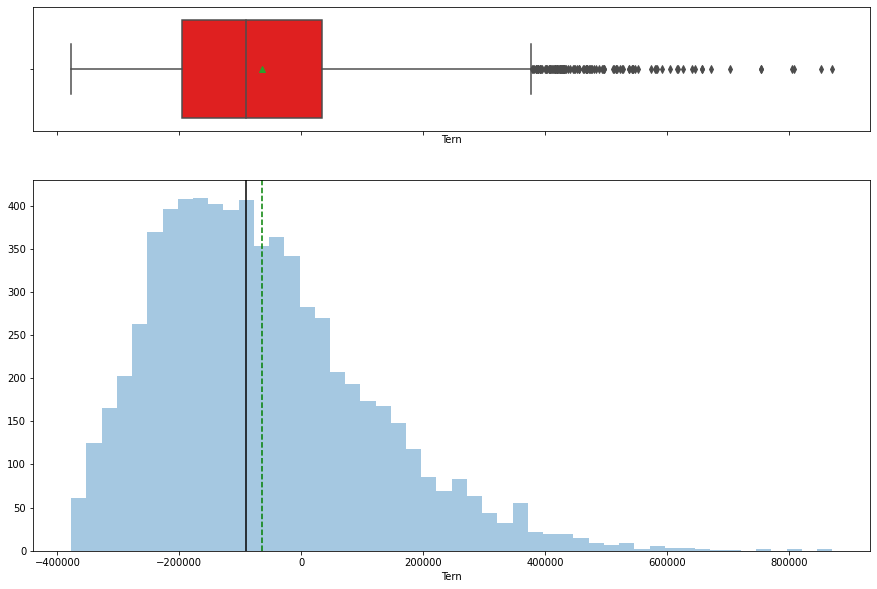

In [52]:
histogram_boxplot(data.Tern)

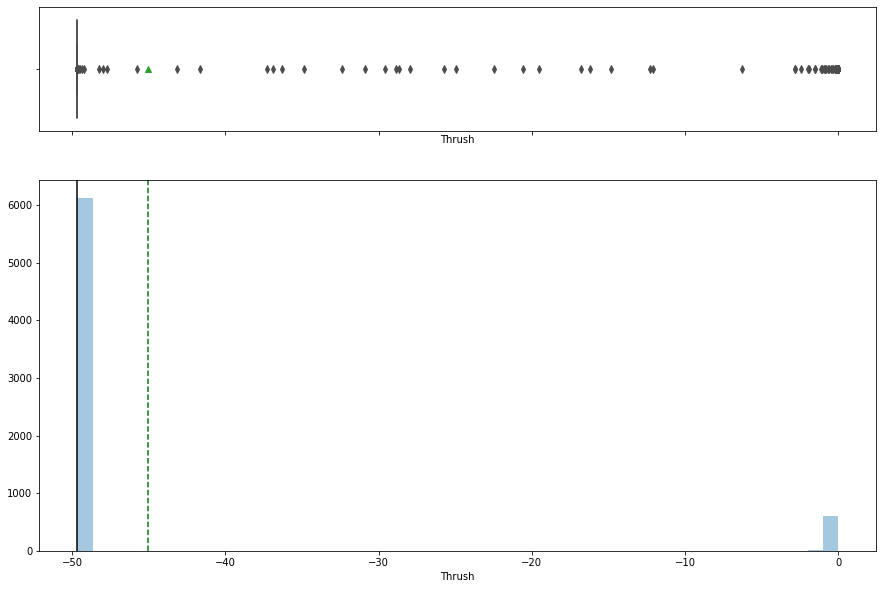

In [53]:
histogram_boxplot(data.Thrush)

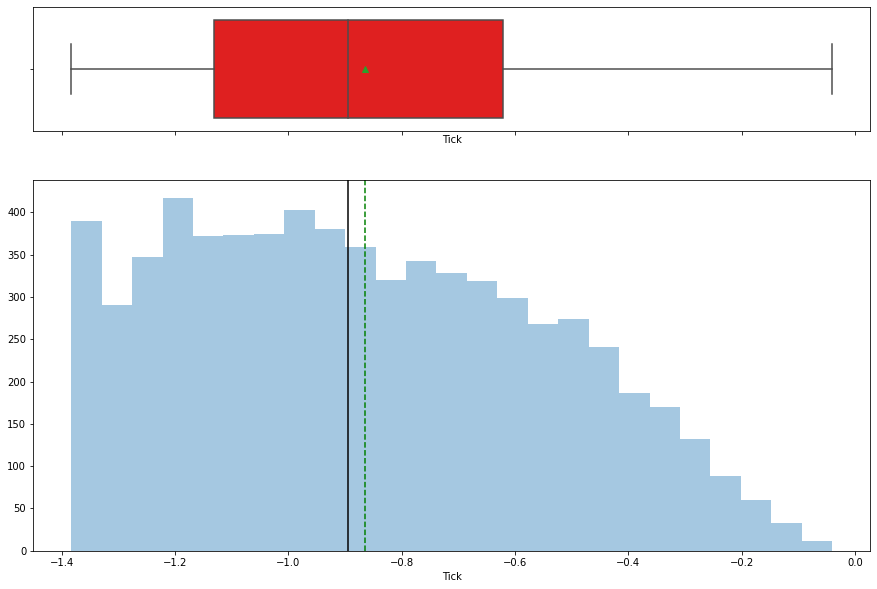

In [54]:
histogram_boxplot(data.Tick)

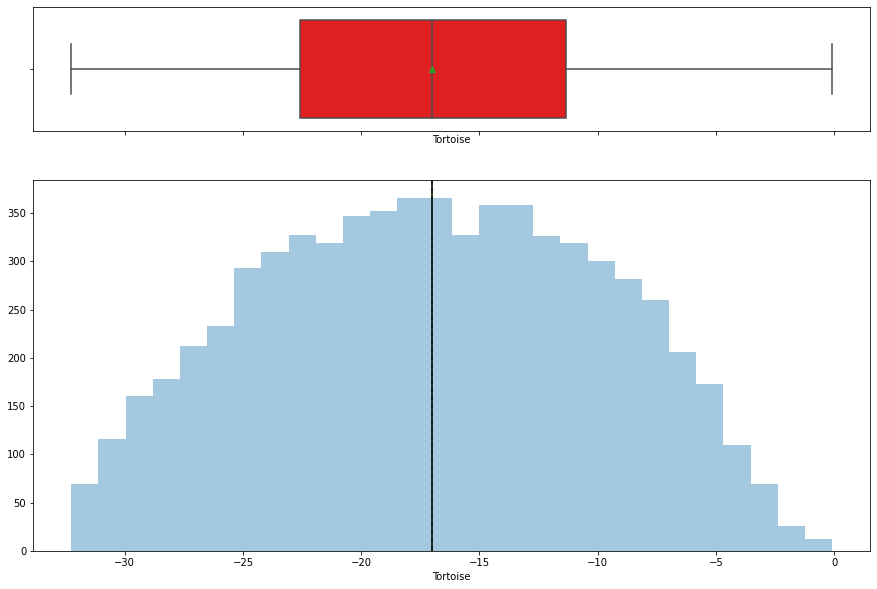

In [55]:
histogram_boxplot(data.Tortoise)

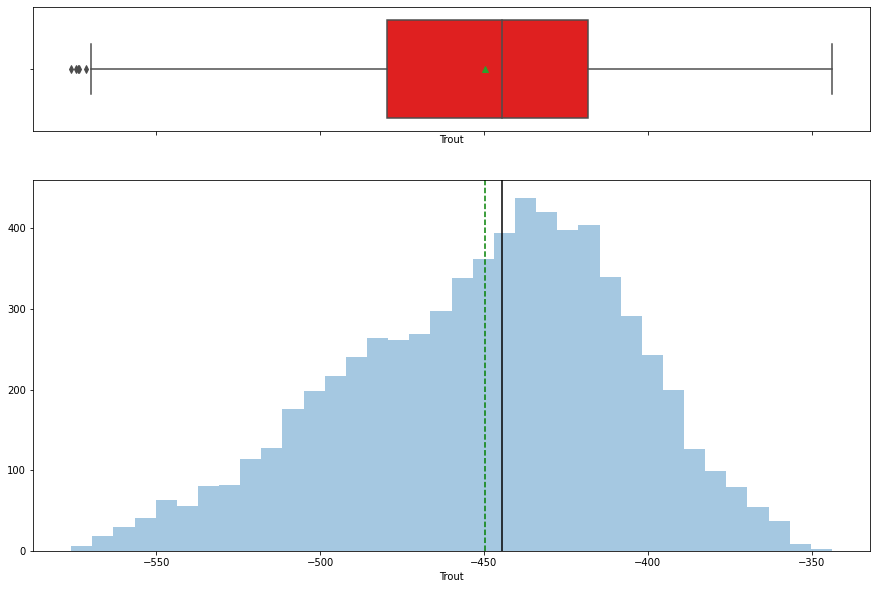

In [56]:
histogram_boxplot(data.Trout)

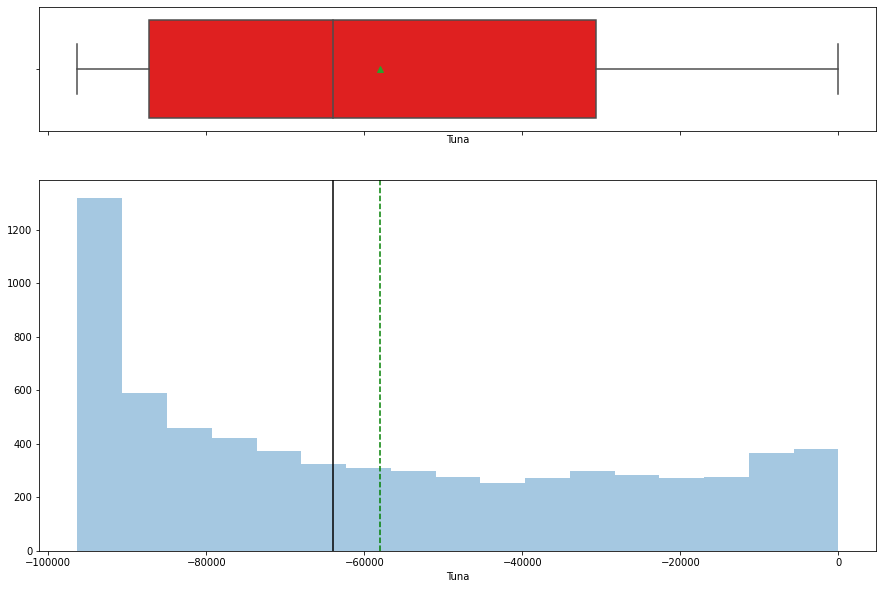

In [57]:
histogram_boxplot(data.Tuna)

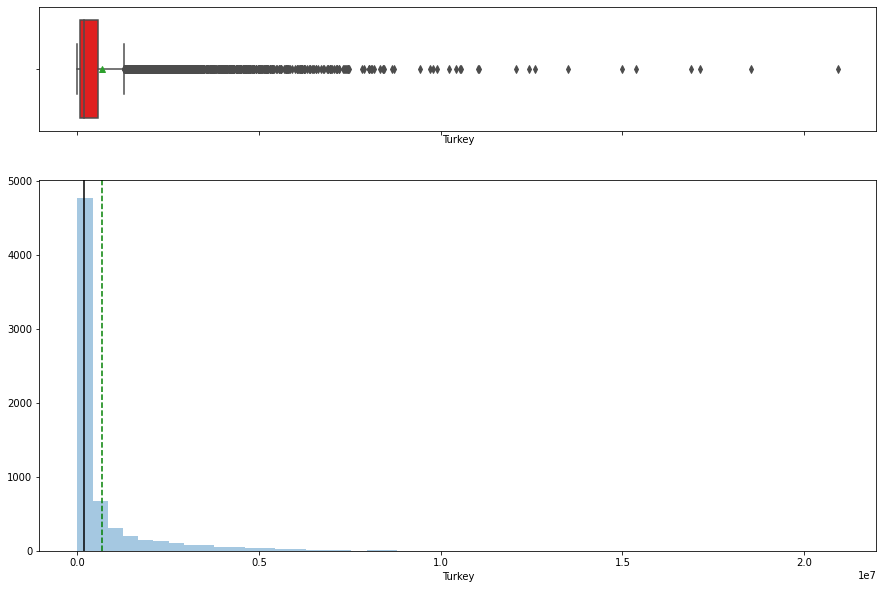

In [58]:
histogram_boxplot(data.Turkey)

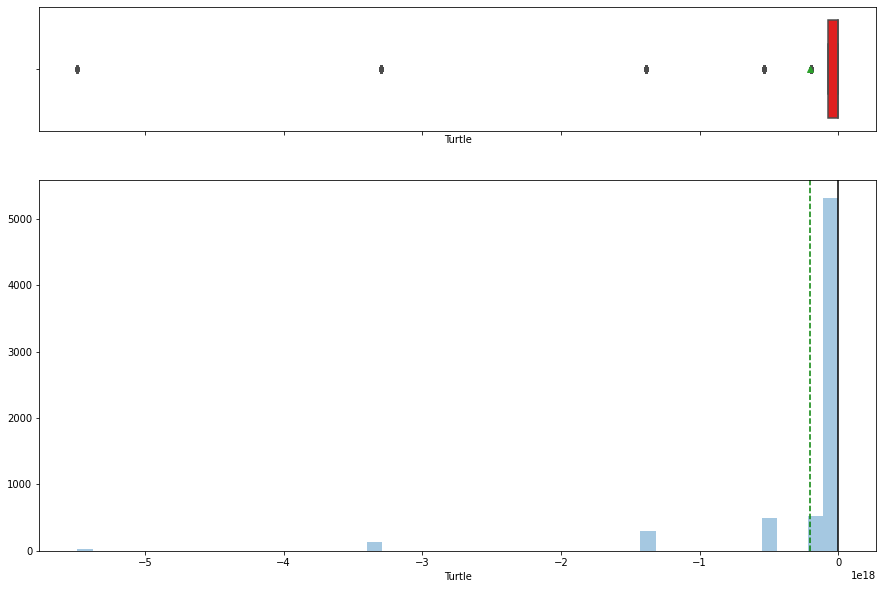

In [59]:
histogram_boxplot(data.Turtle)

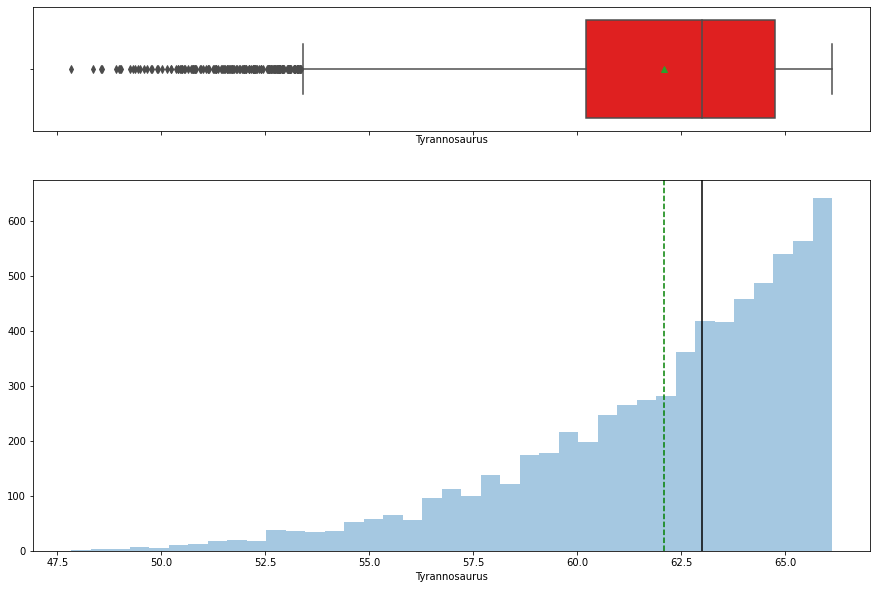

In [60]:
histogram_boxplot(data.Tyrannosaurus)

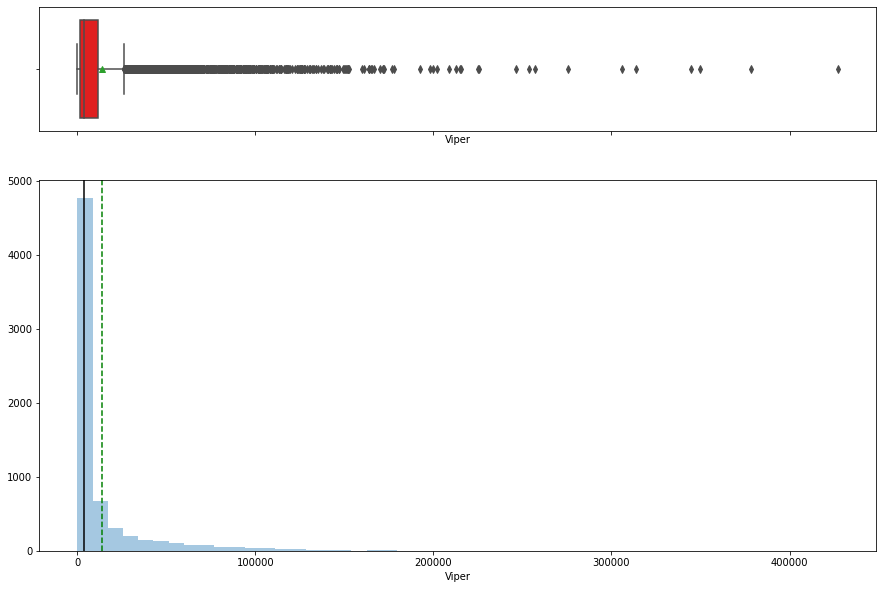

In [61]:
histogram_boxplot(data.Viper)

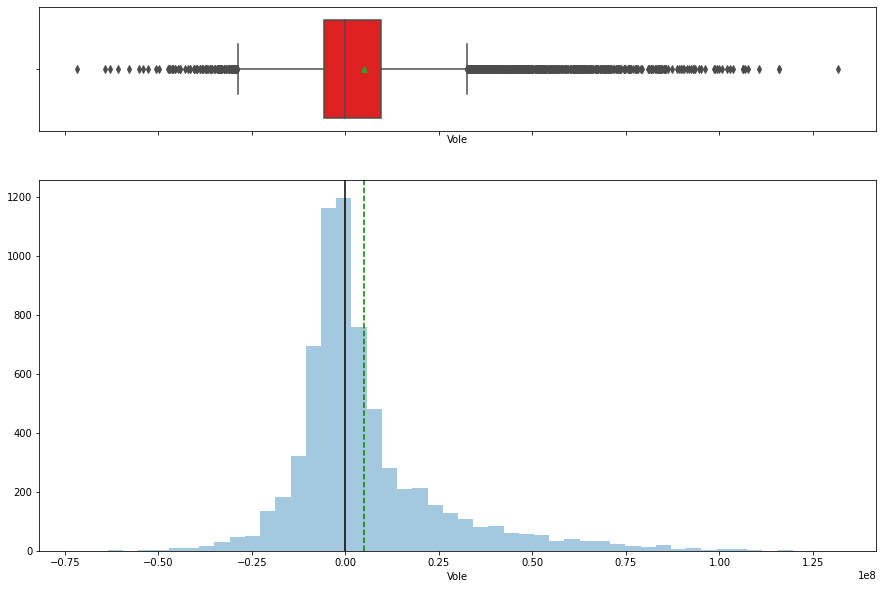

In [62]:
histogram_boxplot(data.Vole)

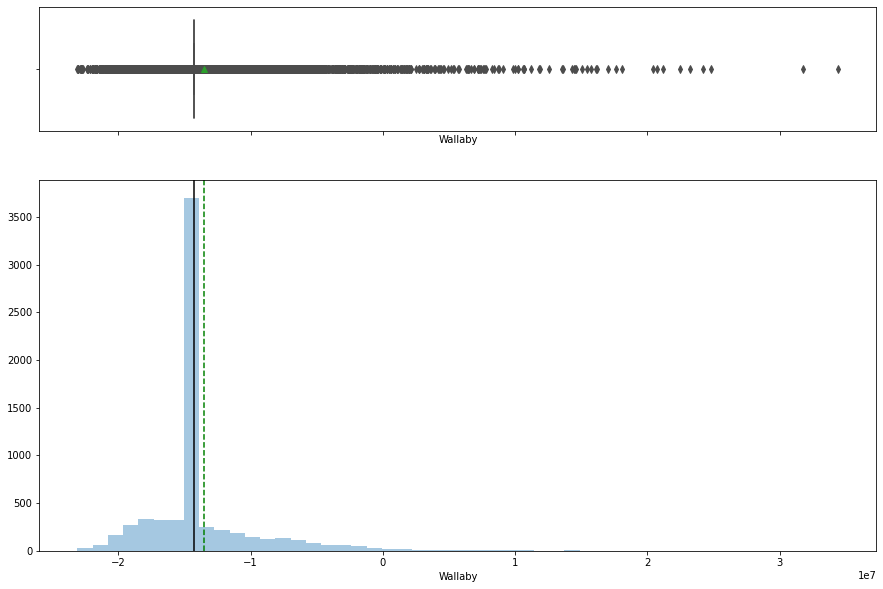

In [63]:
histogram_boxplot(data.Wallaby)

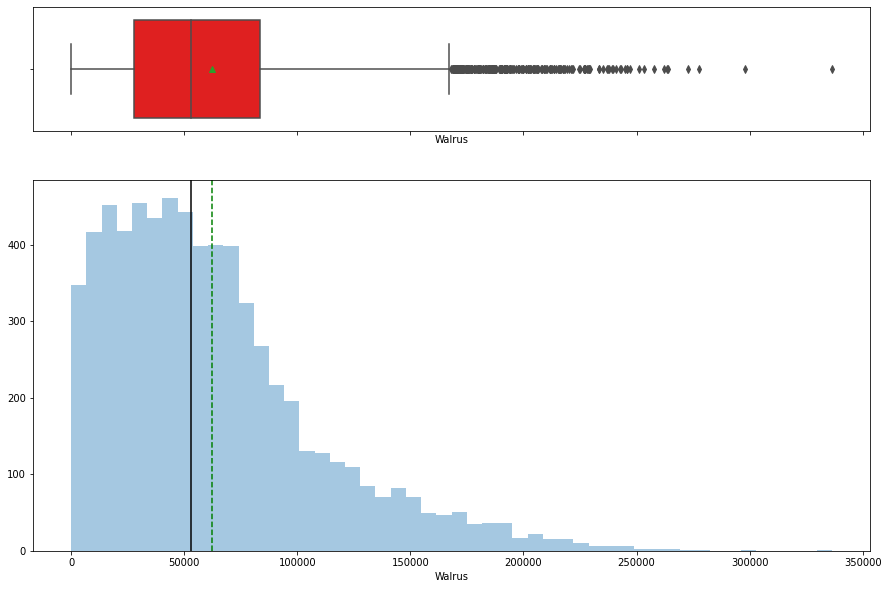

In [64]:
histogram_boxplot(data.Walrus)

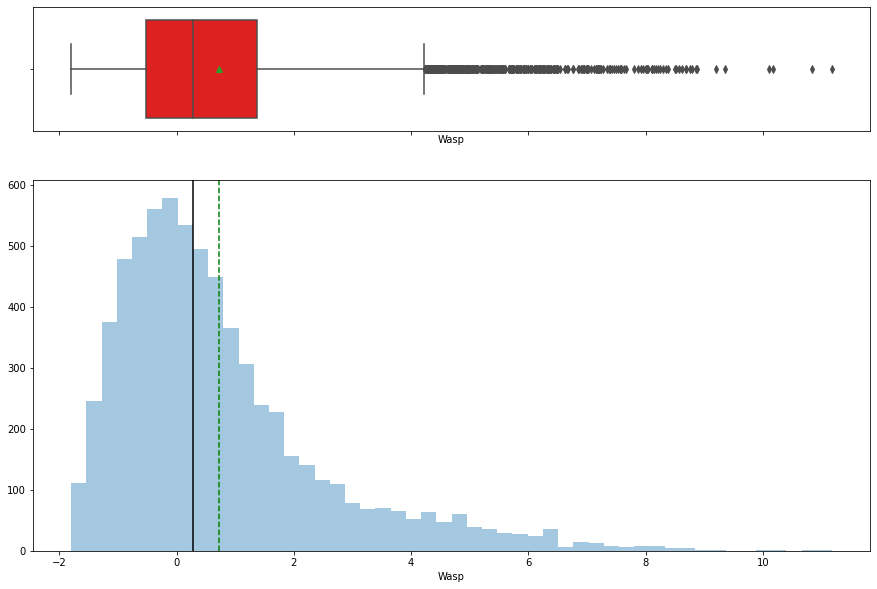

In [65]:
histogram_boxplot(data.Wasp)

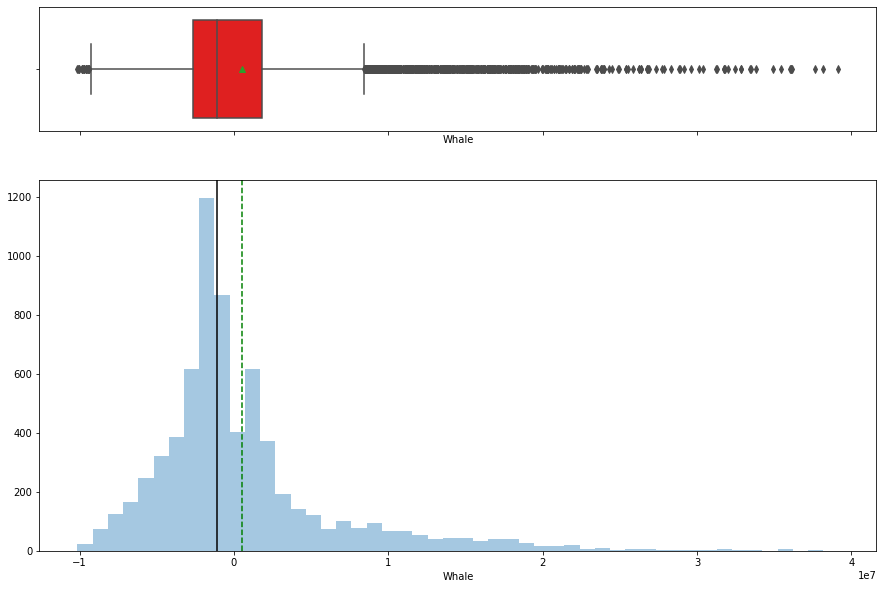

In [66]:
histogram_boxplot(data.Whale)

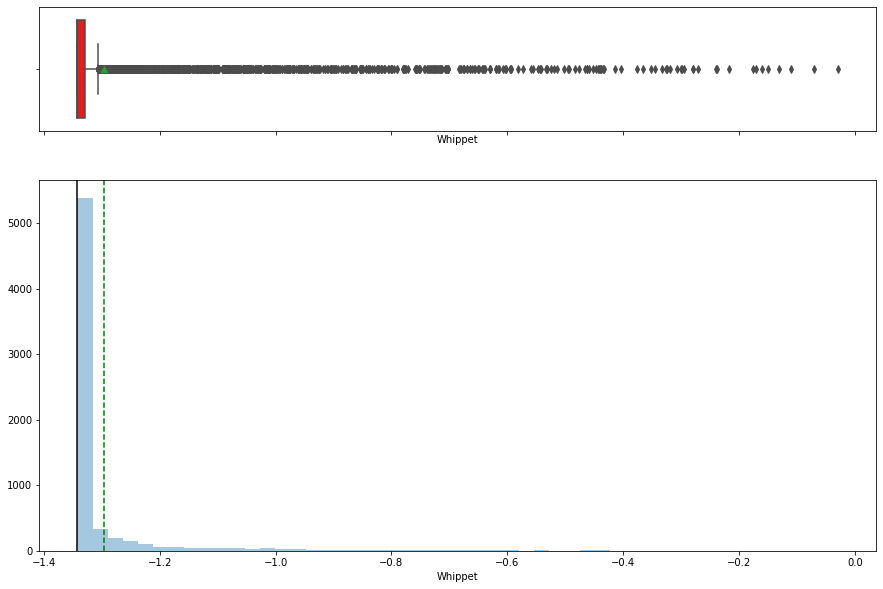

In [67]:
histogram_boxplot(data.Whippet)

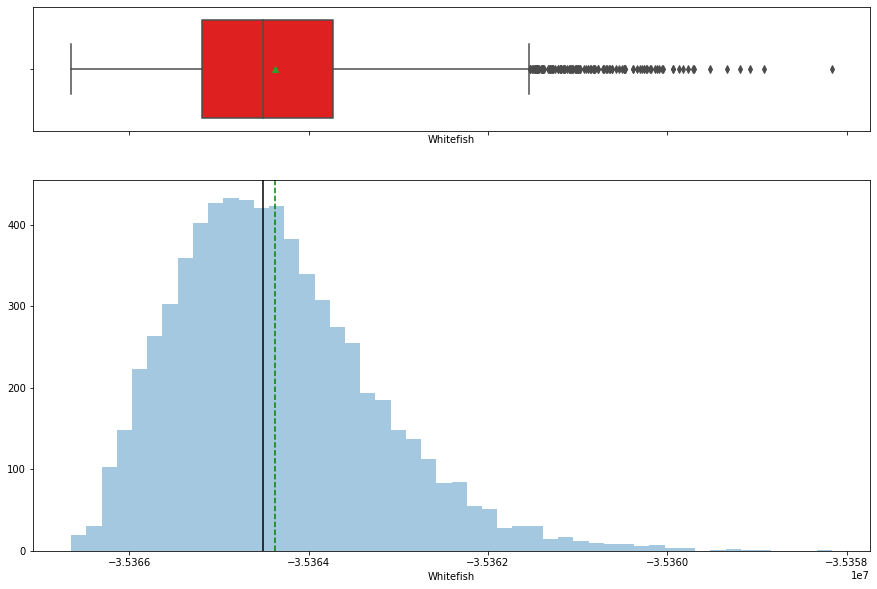

In [68]:
histogram_boxplot(data.Whitefish)

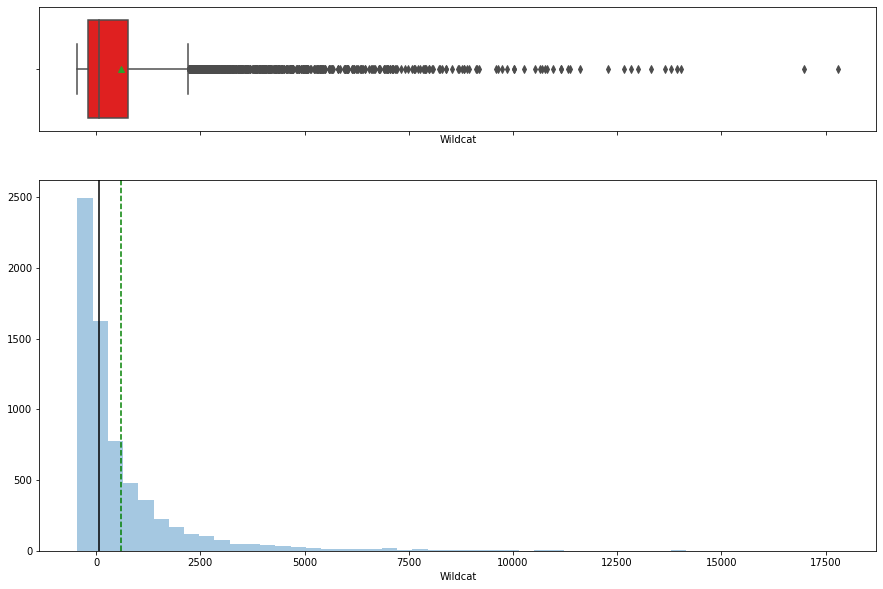

In [69]:
histogram_boxplot(data.Wildcat)

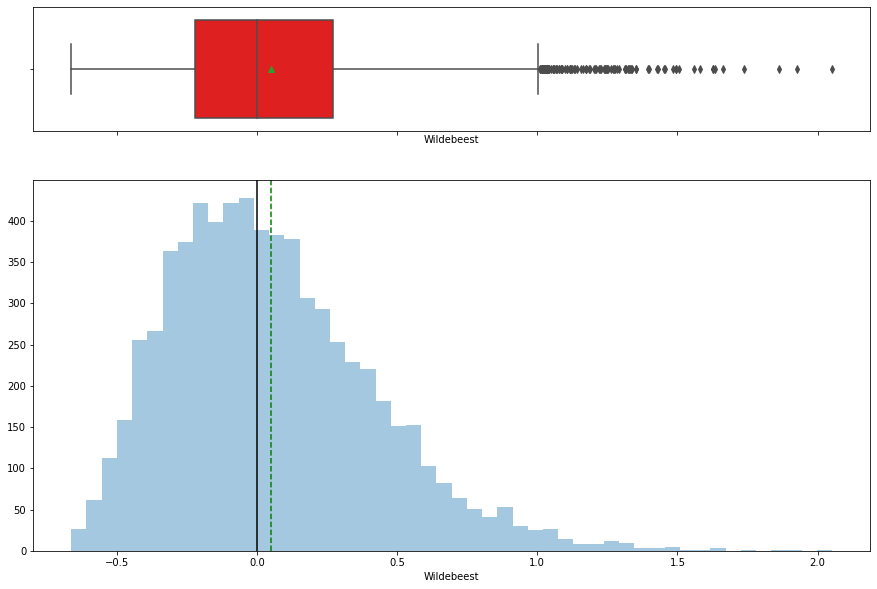

In [70]:
histogram_boxplot(data.Wildebeest)

Visualizing the Categorical variables.

In [71]:
def bar_perc(data, z):
    
    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (35, 5))
    
    # plt.xticks(rotation = 45)
    
    ax = sns.countplot(data[z], palette = 'Paired')
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        
        y = p.get_y() + p.get_height()                              # Height of the plot
        
        ax.annotate(percentage, (x, y), size = 8)                  # Annotate the percentage 
        
    plt.show()                                                      # Display the plot

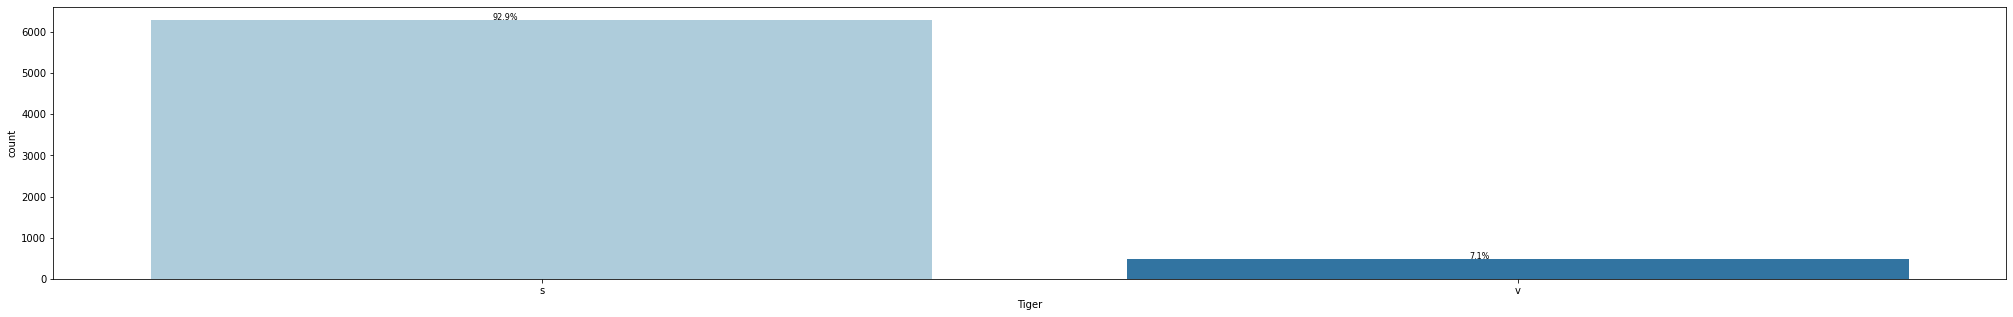

In [72]:
bar_perc(data, 'Tiger')

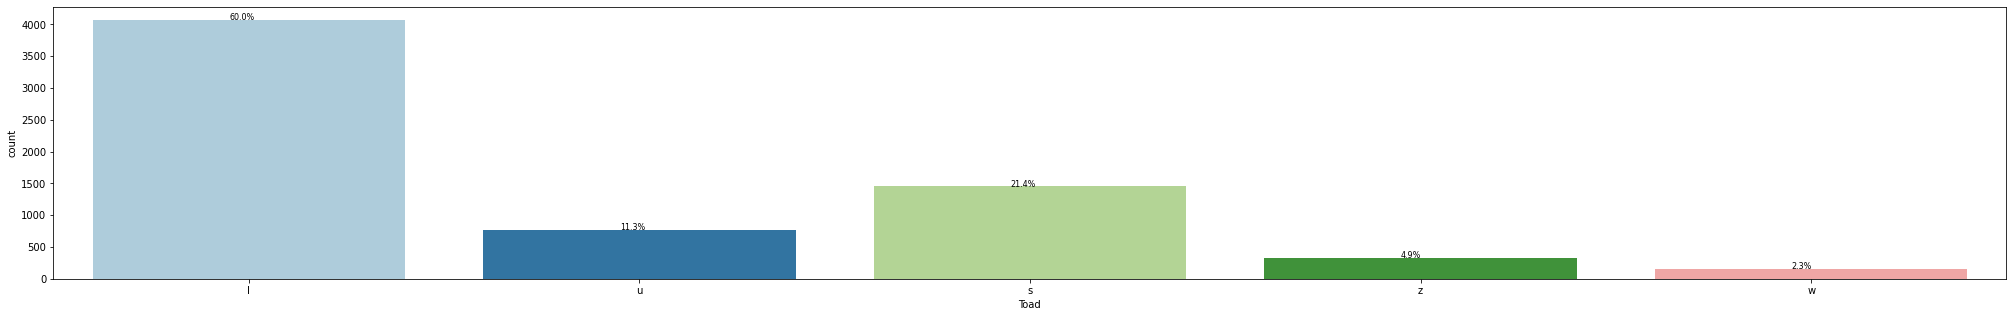

In [73]:
bar_perc(data, 'Toad')

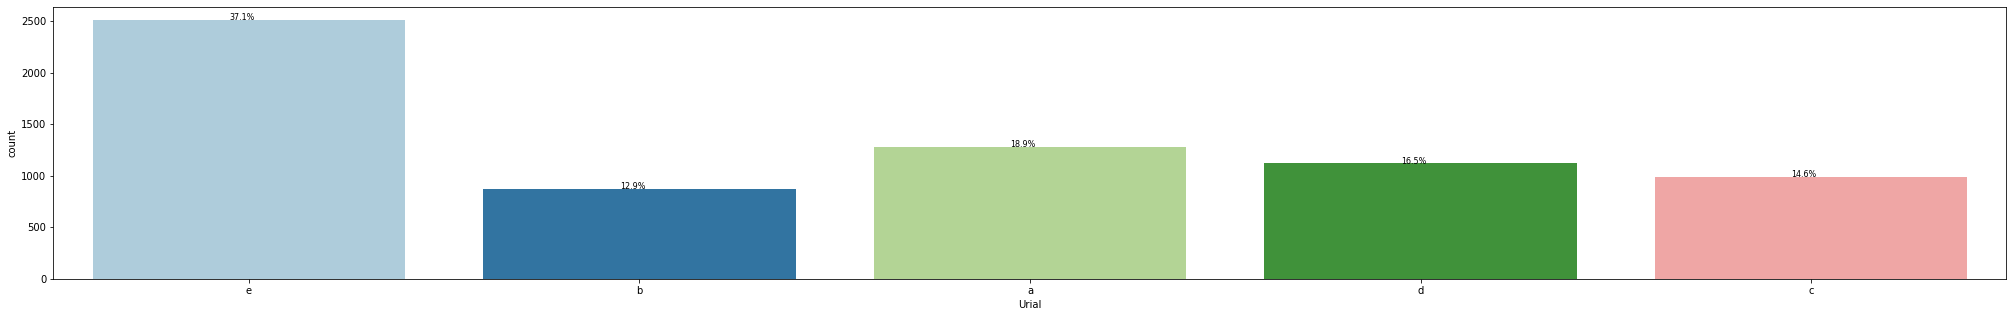

In [74]:
bar_perc(data, 'Urial')

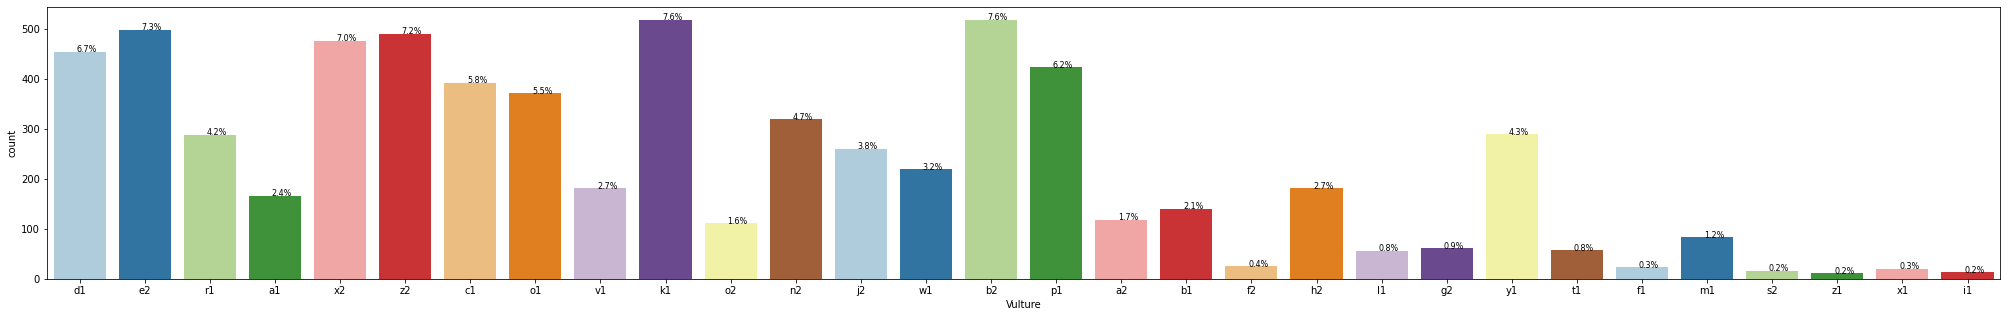

In [75]:
bar_perc(data, 'Vulture')

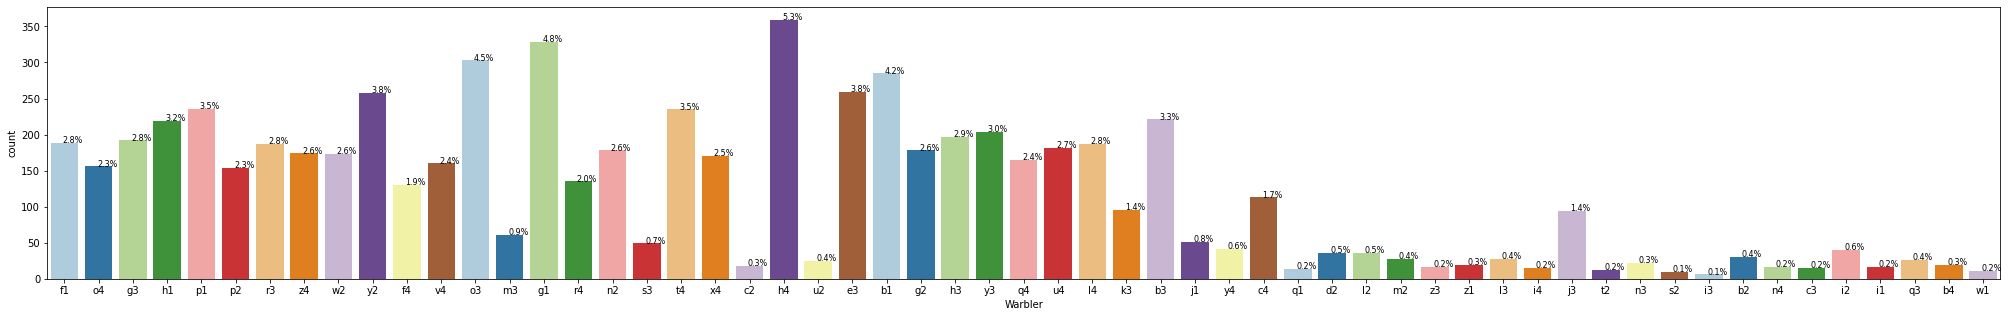

In [76]:
bar_perc(data, 'Warbler')

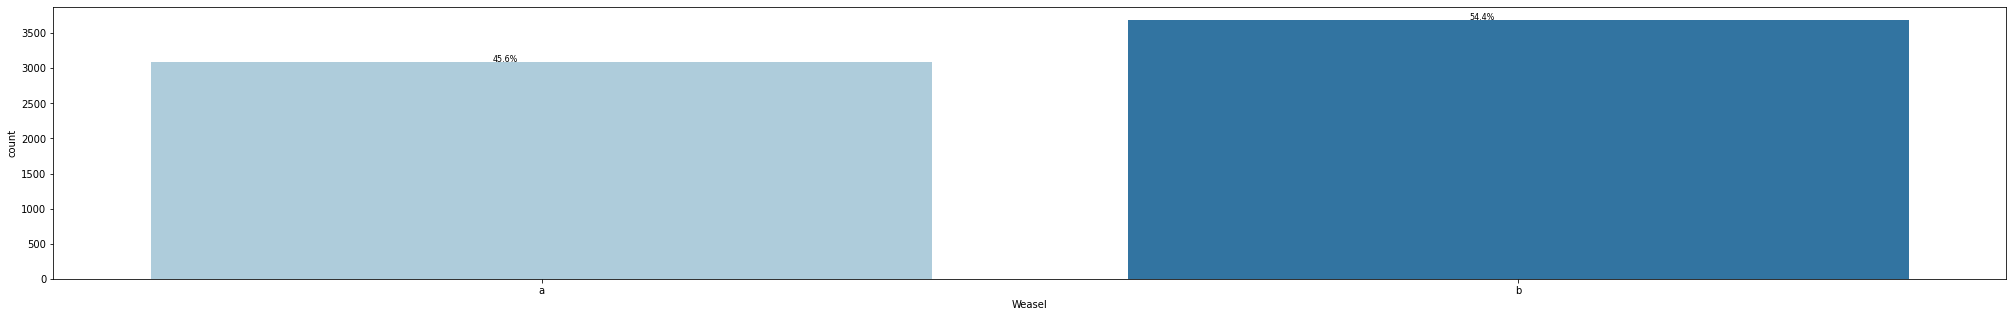

In [77]:
bar_perc(data, 'Weasel')

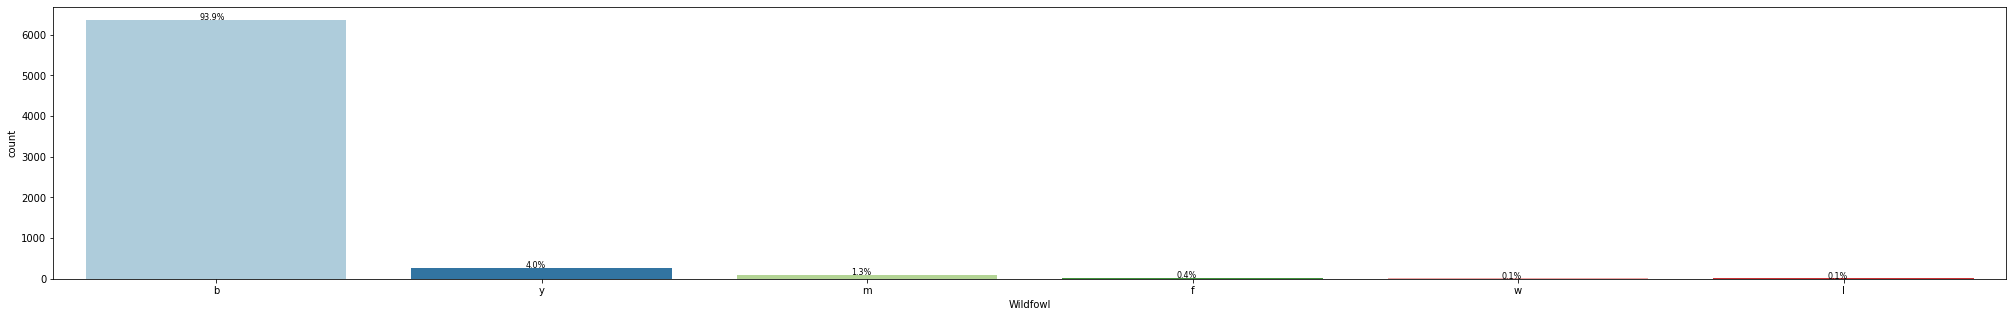

In [78]:
bar_perc(data, 'Wildfowl')

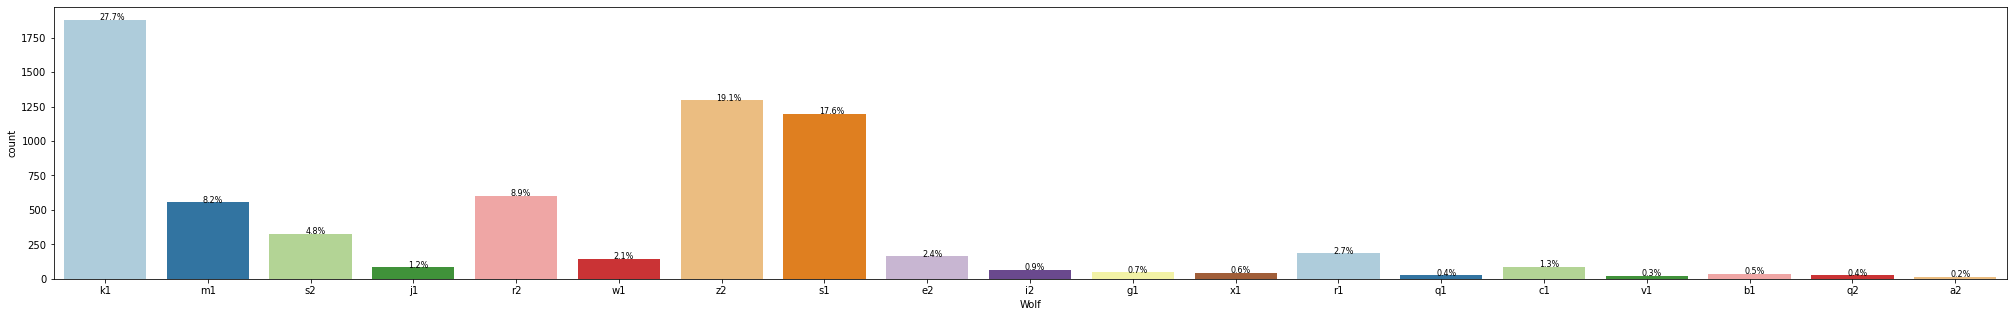

In [79]:
bar_perc(data, 'Wolf')

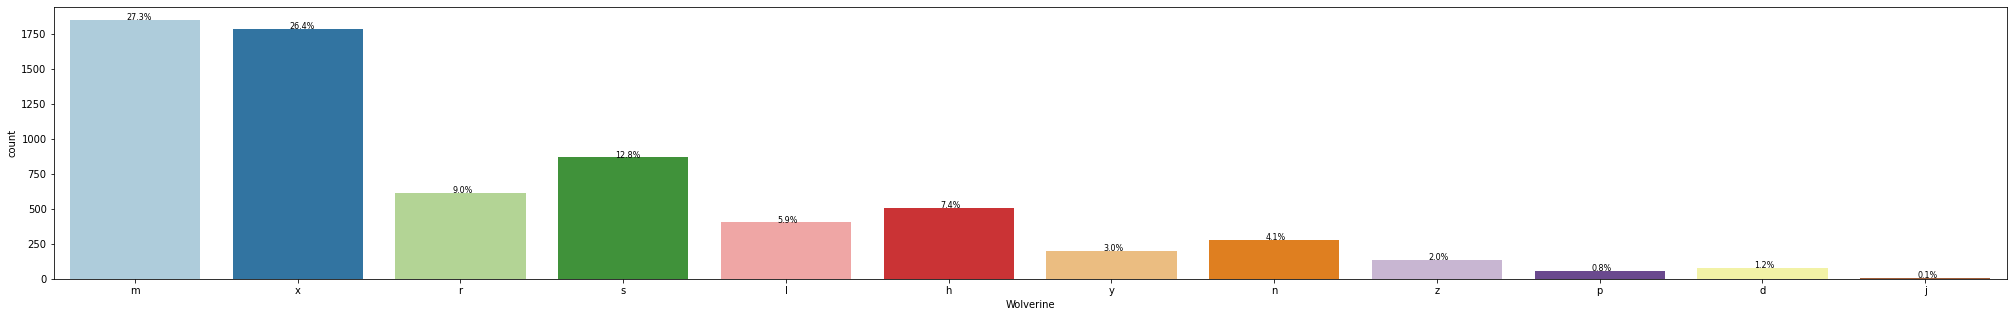

In [80]:
bar_perc(data, 'Wolverine')

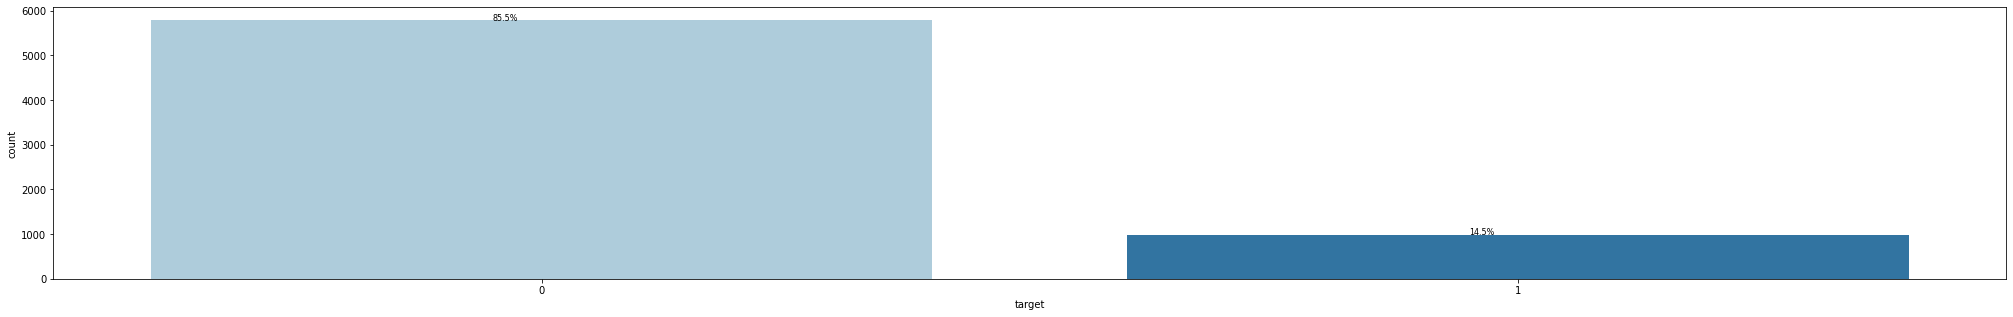

In [81]:
bar_perc(data, 'target')

Multivariate Analysis: Using Correlation

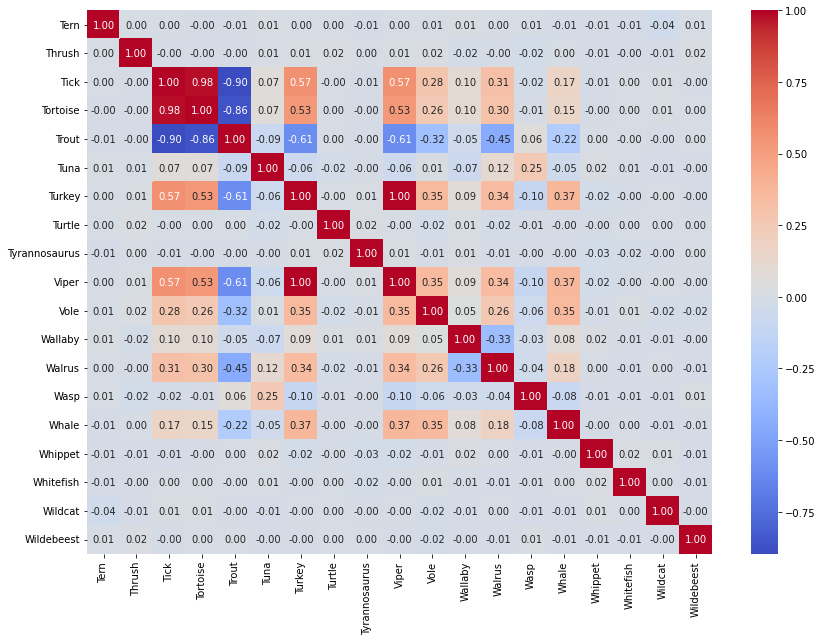

In [82]:
# Check for correlation among numerical variables

num_var = ['Tern', 'Thrush', 'Tick', 'Tortoise', 'Trout', 'Tuna', 'Turkey', 'Turtle', 
           'Tyrannosaurus', 'Viper', 'Vole', 'Wallaby', 'Walrus', 'Wasp', 'Whale', 'Whippet',
           'Whitefish', 'Wildcat', 'Wildebeest']

corr = data[num_var].corr()

# Plot the heatmap

plt.figure(figsize = (14, 10))

sns.heatmap(corr, annot = True, cmap = 'coolwarm',
            
        fmt = ".2f",
            
        xticklabels = corr.columns,
            
        yticklabels = corr.columns)



1.   Trout is seen to be highly negatively correlated with Tick and Tortoise.
2.   Viper has positive correlations with Tick and Tortoise but negatively correlated with Trout.
3.   Turkey is been observed to be positively correlated to Tick and Tortoise.





In [83]:
# sns.pairplot(df[num_var], corner = True)

# plt.show()

In [84]:
Y = data.target
X = data.drop(columns = ['target'])
test_actual_target = test.target
test_features= test.drop(columns= ['target'])
# test_actual_target = test.target

In [85]:
X.shape

(6777, 28)

In [86]:
test_features.shape

(1031, 28)

In [87]:
to_get_dummies_for = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
            'Wolverine']
for i in to_get_dummies_for:
  X[i] = pd.factorize(X[i])[0]

In [88]:
X.head()

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,Warbler,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine
0,-253077.772390,-49.659246,-0.679765,0,0,-12.055165,-463.332642,-41860.419322,3.256739e+05,-4.542838e+11,...,0,0,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,0,0,0
1,380192.123132,-49.659246,-1.356456,0,0,-30.235998,-388.822813,-94810.029959,1.154421e+03,-3.356728e+12,...,1,1,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,0,1,1
2,-218627.876963,-49.659246,-0.542194,0,0,-10.443575,-519.014942,-46075.931683,2.248867e+06,-1.671217e+11,...,2,0,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,0,2,2
4,-169250.190006,-49.659246,-0.600561,0,0,-10.269902,-455.225099,-41390.990681,2.689196e+05,-5.327237e+17,...,3,0,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,0,3,3
5,-68161.820081,-49.659246,-0.882380,0,0,-16.547101,-407.422566,-43057.245834,1.826905e+05,-1.671217e+11,...,4,1,-6.839139e+05,-1.337109,-3.536274e+07,-115.853672,-0.432992,0,0,1


In [89]:
for i in to_get_dummies_for:
  test_features[i] = pd.factorize(test_features[i])[0]

In [90]:
test_features.head()

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,Warbler,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine
0,10037.569173,-49.659246,-1.136071,0,0,-26.668479,-416.498726,-68609.347455,9.545921e+04,-3.680482e+15,...,0,0,-1.654323e+06,-1.342072,-3.528056e+07,64.911670,-0.314766,0,0,0
1,309793.427988,-49.659246,-0.405625,0,1,-9.135203,-504.070169,-39477.100060,1.993753e+06,-1.671217e+11,...,1,1,-3.070990e+06,-1.340854,-3.528065e+07,-12.327810,0.836566,0,1,1
2,-211799.890072,-49.659246,-1.264768,0,1,-33.497916,-369.689046,-8971.914423,5.490111e+04,-3.356728e+12,...,2,0,2.571013e+05,-1.305239,-3.528212e+07,-65.275581,0.405433,0,2,0
3,126491.946464,-49.659246,-0.657188,0,1,-13.408124,-474.511672,-2781.100939,1.906031e+05,-2.261746e+10,...,3,1,-3.562542e+06,-1.295844,-3.527862e+07,-131.275734,0.076052,0,1,2
4,-263898.558134,-49.659246,-0.806868,0,0,-16.425848,-426.317969,-43766.391718,1.533545e+05,-6.148062e+10,...,4,0,-1.329357e+06,-1.341364,-3.528261e+07,389.990411,-0.341824,0,2,3


Using the concatenation and then dummies.

In [91]:
X['train'] =1
test_features['train'] =0


In [92]:
combined = pd.concat([X, test_features])
df_new = pd.get_dummies(combined[to_get_dummies_for])
combined = pd.concat([combined, df_new], axis = 1)
train_df = combined[combined['train']==1]
test_df = combined[combined['train']==0]

In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1030
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           1031 non-null   float64
 1   Thrush         1031 non-null   float64
 2   Tick           1031 non-null   float64
 3   Tiger          1031 non-null   int64  
 4   Toad           1031 non-null   int64  
 5   Tortoise       1031 non-null   float64
 6   Trout          1031 non-null   float64
 7   Tuna           1031 non-null   float64
 8   Turkey         1031 non-null   float64
 9   Turtle         1031 non-null   float64
 10  Tyrannosaurus  1031 non-null   float64
 11  Urial          1031 non-null   int64  
 12  Viper          1031 non-null   float64
 13  Vole           1031 non-null   float64
 14  Vulture        1031 non-null   int64  
 15  Wallaby        1031 non-null   float64
 16  Walrus         1031 non-null   float64
 17  Wasp           1031 non-null   float64
 18  Warbler 

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6777 entries, 0 to 7002
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tern           6777 non-null   float64
 1   Thrush         6777 non-null   float64
 2   Tick           6777 non-null   float64
 3   Tiger          6777 non-null   int64  
 4   Toad           6777 non-null   int64  
 5   Tortoise       6777 non-null   float64
 6   Trout          6777 non-null   float64
 7   Tuna           6777 non-null   float64
 8   Turkey         6777 non-null   float64
 9   Turtle         6777 non-null   float64
 10  Tyrannosaurus  6777 non-null   float64
 11  Urial          6777 non-null   int64  
 12  Viper          6777 non-null   float64
 13  Vole           6777 non-null   float64
 14  Vulture        6777 non-null   int64  
 15  Wallaby        6777 non-null   float64
 16  Walrus         6777 non-null   float64
 17  Wasp           6777 non-null   float64
 18  Warbler 

In [94]:
# #  Creating the list of columns for which we need to create the dummy variables
# to_get_dummies_for = ['Tiger', 'Toad', 'Urial', 'Vulture', 'Warbler', 'Weasel', 'Wildfowl','Wolf',
#             'Wolverine']

# # Creating dummy variables
# test_features = pd.get_dummies(data=test_features, columns = to_get_dummies_for, drop_first = True)      

In [86]:
# # Creating dummy variables for the categorical variables
# train_fea = pd.get_dummies(X, drop_first = True)
# # test_fea = pd.get_dummies(test_features, drop_first= True)
# train_fea.head()

In [97]:
# Scaling the data
sc = StandardScaler()

train_fea_scaled = sc.fit_transform(train_df)
test_fea_scaled = sc.fit_transform(test_df)
train_fea_scaled = pd.DataFrame(train_fea_scaled, columns = train_df.columns)
test_fea_scaled = pd.DataFrame(test_fea_scaled, columns = test_df.columns)

In [98]:
train_fea_scaled

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,train,Tiger,Toad,Urial,Vulture,Warbler,Weasel,Wildfowl,Wolf,Wolverine
0,-1.073001,-0.322144,0.578541,-0.277328,-0.722161,0.689431,-0.317691,0.521042,-0.264553,0.330315,...,0.0,-0.277328,-0.722161,-1.072752,-1.399370,-1.510715,-1.092989,-0.212636,-1.125357,-0.942482
1,2.539311,-0.322144,-1.546261,-0.277328,-0.722161,-1.841761,1.419396,-1.189460,-0.501774,0.330310,...,0.0,-0.277328,-0.722161,-0.397286,-1.250427,-1.429536,0.914923,-0.212636,-0.859726,-0.525454
2,-0.876491,-0.322144,1.010509,-0.277328,-0.722161,0.913802,-1.615842,0.384862,1.141284,0.330315,...,0.0,-0.277328,-0.722161,-1.072752,-1.101483,-1.348358,-1.092989,-0.212636,-0.594094,-0.108426
3,-0.594830,-0.322144,0.827238,-0.277328,-0.722161,0.937981,-0.128676,0.536206,-0.306040,-0.537305,...,0.0,-0.277328,-0.722161,0.278180,-0.952540,-1.267179,-1.092989,-0.212636,-0.328463,0.308602
4,-0.018199,-0.322144,-0.057669,-0.277328,-0.722161,0.064050,0.985770,0.482379,-0.369072,0.330315,...,0.0,-0.277328,-0.722161,0.278180,-1.250427,-1.186000,0.914923,-0.212636,-1.125357,-0.525454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,-1.037423,-0.322144,-0.995117,-0.277328,-0.722161,-1.236335,1.215779,-1.160165,-0.445437,0.330315,...,0.0,-0.277328,-0.722161,-0.397286,-0.058879,-1.104821,0.914923,-0.212636,-0.062831,-0.525454
6773,0.183904,-0.322144,1.598192,-0.277328,-0.722161,1.510492,-1.281716,-0.905702,1.975343,0.330315,...,0.0,-0.277328,-0.722161,0.278180,0.239009,2.223513,-1.092989,-0.212636,0.734063,2.393743
6774,-0.051454,-0.322144,-0.014658,-0.277328,-0.722161,0.096352,-0.327082,-1.237675,-0.431676,0.286071,...,0.0,-0.277328,-0.722161,-1.072752,-0.654653,1.005830,-1.092989,-0.212636,0.999695,-0.942482
6775,-1.218724,1.966900,0.592434,-0.277328,0.203347,0.738300,-0.530950,0.545673,0.211139,-1.924665,...,0.0,-0.277328,0.203347,0.278180,-0.505709,-0.536569,-1.092989,-0.212636,-0.062831,1.142658


In [99]:
test_fea_scaled

,Tern,Thrush,Tick,Tiger,Toad,Tortoise,Trout,Tuna,Turkey,Turtle,...,train,Tiger,Toad,Urial,Vulture,Warbler,Weasel,Wildfowl,Wolf,Wolverine
0,0.425720,-0.331502,-1.060606,-0.322056,-0.589465,-1.158009,0.357179,-0.596261,-0.354751,0.314012,...,0.0,-0.322056,-0.589465,-0.892342,-1.432678,-1.285866,-0.866270,-0.158063,-0.944924,-0.950193
1,2.374085,-0.331502,1.317590,-0.322056,0.131458,1.109201,-1.573740,0.272133,0.479089,0.320311,...,0.0,-0.322056,0.131458,-0.892342,-1.279738,-1.219320,1.154374,-0.158063,-0.682827,-0.603169
2,-1.016188,-0.331502,-1.479620,-0.322056,0.131458,-2.041116,1.389316,1.181453,-0.372566,0.320306,...,0.0,-0.322056,0.131458,-0.892342,-1.126799,-1.152775,-0.866270,-0.158063,-0.420729,-0.950193
3,1.182655,-0.331502,0.498545,-0.322056,0.131458,0.556674,-0.921986,1.365993,-0.312958,0.320311,...,0.0,-0.322056,0.131458,-0.892342,-0.973859,-1.086229,1.154374,-0.158063,-0.682827,-0.256145
4,-1.354821,-0.331502,0.011217,-0.322056,-0.589465,0.166455,0.140668,0.144275,-0.329320,0.320311,...,0.0,-0.322056,-0.589465,-0.892342,-0.820919,-1.019683,-0.866270,-0.158063,-0.420729,0.090879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,2.323568,-0.331502,1.581120,-0.322056,0.852382,1.362807,-1.094848,-1.198897,1.125600,0.320296,...,0.0,-0.322056,0.852382,0.438106,1.473175,1.309425,1.154374,-0.158063,-0.682827,0.437903
1027,-0.306463,-0.331502,0.401651,-0.322056,0.852382,0.518077,-0.109270,0.903299,-0.053885,0.320311,...,0.0,-0.322056,0.852382,-0.892342,0.402598,-1.019683,1.154374,-0.158063,0.627662,1.826000
1028,0.696118,-0.331502,-0.520765,3.702664,0.131458,-0.724510,0.409674,-1.271704,-0.352044,0.319459,...,0.0,3.702664,0.131458,0.438106,1.473175,0.377782,-0.866270,-0.158063,-0.420729,0.090879
1029,0.142764,-0.331502,-1.441307,-0.322056,-0.589465,-1.521307,1.895870,-0.807272,-0.384105,0.320269,...,0.0,-0.322056,-0.589465,1.103330,0.096718,-0.287677,-0.866270,-0.158063,-0.682827,-0.950193


In [100]:
x_train, x_val, y_train, y_val = train_test_split(train_fea_scaled, Y, test_size = 0.2, random_state = 1, stratify = Y)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['0','1'], yticklabels = ['0','1'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

In [103]:
# Fitting the logistic regression model
lg = LogisticRegression()

lg.fit(x_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4632
           1       0.86      0.73      0.79       789

    accuracy                           0.94      5421
   macro avg       0.91      0.86      0.88      5421
weighted avg       0.94      0.94      0.94      5421



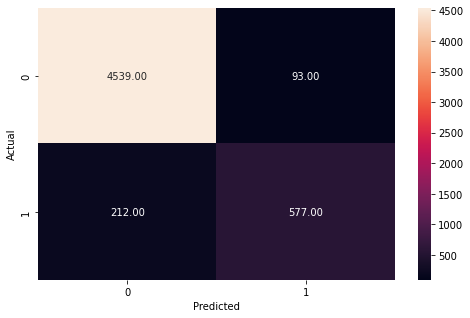

In [104]:
# Checking the performance on the training data
y_pred_train = lg.predict(x_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1159
           1       0.91      0.73      0.81       197

    accuracy                           0.95      1356
   macro avg       0.93      0.86      0.89      1356
weighted avg       0.95      0.95      0.95      1356



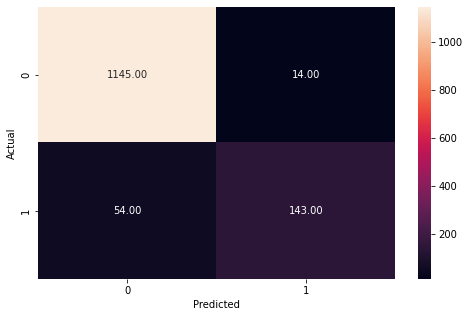

In [105]:
# Checking the performance on the test dataset
y_pred_val = lg.predict(x_val)
metrics_score(y_val, y_pred_val)

              precision    recall  f1-score   support

           0       0.58      0.95      0.72       543
           1       0.83      0.25      0.38       488

    accuracy                           0.62      1031
   macro avg       0.71      0.60      0.55      1031
weighted avg       0.70      0.62      0.56      1031



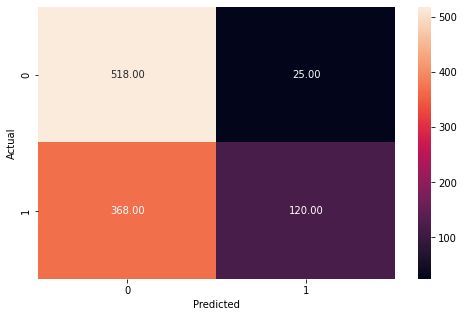

In [106]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(test_fea_scaled)
metrics_score(test_actual_target, y_pred_test)

In [107]:
results=pd.DataFrame(y_pred_test)

In [108]:
results.to_csv('/content/drive/MyDrive/PAYTM_MLE/PAYTM_take_home_assign/results.csv')

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf = RandomForestClassifier(n_estimators= 100)

In [111]:
rf.fit(x_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4632
           1       1.00      1.00      1.00       789

    accuracy                           1.00      5421
   macro avg       1.00      1.00      1.00      5421
weighted avg       1.00      1.00      1.00      5421



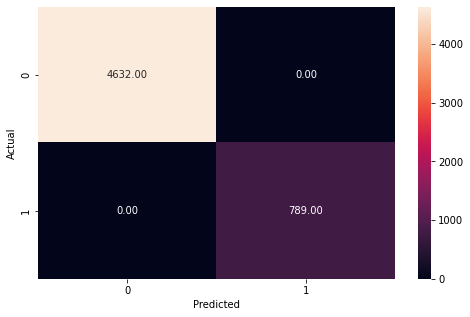

In [112]:
# Checking the performance on the training data
y_pred_train_rf = rf.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.61      0.93      0.74       543
           1       0.82      0.34      0.48       488

    accuracy                           0.65      1031
   macro avg       0.72      0.64      0.61      1031
weighted avg       0.71      0.65      0.62      1031



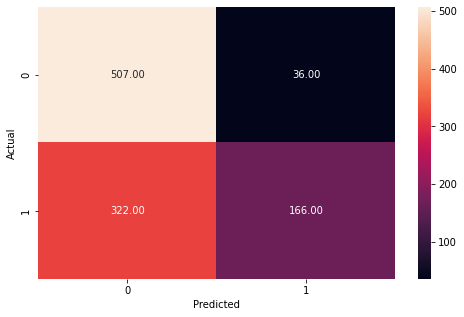

In [113]:
# Checking the performance on the test dataset
y_pred_test_rf = rf.predict(test_fea_scaled)
metrics_score(test_actual_target, y_pred_test_rf)

The model seems to overfit as it gives 100% accuracy on the training data whereas just 65% accuracy on the test data. The possible reason seen can be the lack of data in the features.